In [1]:
%matplotlib inline

In [2]:
#export
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.pandas.set_option('display.max_columns', None)
Path.ls=lambda x: list(x.iterdir())

In [3]:
path_tabdata=Path(r'D:\datasets\new_datasets')
list(path_data.iterdir())

[WindowsPath('D:/datasets/new_datasets/caterpillar-tube-pricing'),
 WindowsPath('D:/datasets/new_datasets/costa-rican-household-poverty-prediction'),
 WindowsPath('D:/datasets/new_datasets/flavours-of-physics-kernels-only'),
 WindowsPath('D:/datasets/new_datasets/higgs-boson'),
 WindowsPath('D:/datasets/new_datasets/leaf-classification'),
 WindowsPath('D:/datasets/new_datasets/mercedes-benz-greener-manufacturing'),
 WindowsPath('D:/datasets/new_datasets/msk-redefining-cancer-treatment'),
 WindowsPath('D:/datasets/new_datasets/MusicHackathon'),
 WindowsPath('D:/datasets/new_datasets/nomad2018-predict-transparent-conductors'),
 WindowsPath('D:/datasets/new_datasets/porto-seguro-safe-driver-prediction'),
 WindowsPath('D:/datasets/new_datasets/predict-west-nile-virus'),
 WindowsPath('D:/datasets/new_datasets/predict-who-is-more-influential-in-a-social-network'),
 WindowsPath('D:/datasets/new_datasets/random-acts-of-pizza'),
 WindowsPath('D:/datasets/new_datasets/recruit-restaurant-visitor-

In [4]:
path_house=path_data/'sberbank-russian-housing-market'
list(path_house.iterdir())

[WindowsPath('D:/datasets/new_datasets/sberbank-russian-housing-market/data_dictionary.txt'),
 WindowsPath('D:/datasets/new_datasets/sberbank-russian-housing-market/macro.csv.zip'),
 WindowsPath('D:/datasets/new_datasets/sberbank-russian-housing-market/New folder'),
 WindowsPath('D:/datasets/new_datasets/sberbank-russian-housing-market/sample_submission.csv.zip'),
 WindowsPath('D:/datasets/new_datasets/sberbank-russian-housing-market/test.csv'),
 WindowsPath('D:/datasets/new_datasets/sberbank-russian-housing-market/train.csv'),
 WindowsPath('D:/datasets/new_datasets/sberbank-russian-housing-market/__MACOSX')]

In [5]:
path_house_train=path_house/'train.csv'
path_house_test=path_house/'test.csv'

In [43]:
df_train=pd.read_csv(path_house_train, index_col='id', parse_dates=['timestamp'], infer_datetime_format=True)
df_train.head()

timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
id                                                                        
1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

    num_room  kitch_sq  state product_type           sub_area        area_m  \
id                                                                            
1        NaN       NaN    NaN   Investment           Bibirevo  6.407578e+06   
2        NaN       NaN    NaN   Investment  Nagatinskij Zaton  9.589337e+06   
3        NaN       NaN    NaN   Investment     Tekstil'shhiki  4.808270e+06   
4        NaN       NaN    NaN   Investment             Mitino  1.258354e+07   
5        NaN       NaN    NaN   Investment          Basmannoe  8.398461e+06   

    raion_popul  green_zone_part  indust_part  children_preschool  \
id                                                                  
1        155572         0.189727     0.000070                9576   
2        115352         0.372602     0.049637                6880   
3        101708         0.112560     0.118537                5879   
4        178473         0.194703     0.069753               13087   
5        108171         0.015234     0.037316                5706   

    preschool_quota  preschool_education_centers_raion  children_school  \
id                                                                        
1            5001.0                                  5            10309   
2            3119.0                                  5             7759   
3            1463.0                                  4             6207   
4            6839.0                                  9            13670   
5            3240.0                                  7             6748   

    school_quota  school_education_centers_raion  \
id                                                 
1        11065.0                               5   
2         6237.0                               8   
3         5580.0                               7   
4        17063.0                              10   
5         7770.0                               9   

    school_education_centers_top_20_raion  hospital_beds_raion  \
id                                                               
1                                       0                240.0   
2                                       0                229.0   
3                                       0               1183.0   
4                                       0                  NaN   
5                                       0                562.0   

    healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
id                                                                           
1                          1                        0                    7   
2                          1                        0                    6   
3                          1                        0                    5   
4                          1                        0                   17   
5                          4                        2                   25   

    additional_education_raion culture_objects_top_25  \
id                                                      
1                            3                     no   
2                            1                    yes   
3                            1                     no   
4                            6                     no   
5                            2                     no   

    culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
id                                                               

In [44]:
#export
def add_datepart(df:pd.DataFrame, cols:list=None, just_date:bool=True,inplace:bool=True)->pd.DataFrame:
    '''parameters:
                df: pd.DataFrame
                cols: datetime cols
                just date: bool specifying whether the object is it just date or date time
                inplace: bool'''
    date_part=['year','month','day','week','dayofweek','weekday','quarter','is_month_start','is_month_end','is_year_end']
    time_part=['time','hour','minute','second']
    for i in cols:
        if not just_date:
            for j in time_part:
                df[f'{i}_{j}']=getattr(df[i].dt,j)
        for j in date_part:
            df[f'{i}_{j}']=getattr(df[i].dt,j)
    df.drop(columns=cols, inplace=True)
    return 

In [45]:
add_datepart(df_train, ['timestamp'])

In [46]:
discrete = [var for var in df_train.columns if df_train[var].dtype!='O' and var!='price_doc' and df_train[var].nunique()<10]
continuous = [var for var in df_train.columns if df_train[var].dtype!='O' and var!='price_doc' and var not in discrete]
categorical = [var for var in df_train.columns if df_train[var].dtype=='O']

In [16]:
len(discrete), len(continuous), len(categorical)

(29, 255, 15)

In [17]:
#export
def split_val(df:pd.DataFrame, val_pct:float=0.3):
    'returns `df_train` and `df_valid`'
    shuf_idx=np.random.permutation(len(df))
    train_idx, val_idx=shuf_idx[int(val_pct*len(df)):], shuf_idx[:int(val_pct*len(df))]
    return df.iloc[train_idx,:], df.iloc[val_idx,:]
    
def split_dep_col(df:pd.DataFrame, y:str):
    'returns `x` and `y`'
    return df.drop(columns=y), df.loc[:, y]
    
def split_test_val(df:pd.DataFrame, y:str, val_pct:float=0.3):
    ''' df 'pandas datadrame object `y` is the dependent column val_pct:=0.3'
    returns `x_train`, `y_train`, `x_valid`, `y_valid`'''
    df_train, df_val= split_val(df, val_pct)
    return split_dep_col(df_train, y), split_dep_col(df_val, y)

In [100]:
(x_train, y_train), (x_val, y_val)= split_test_val(df_train, y='price_doc')

In [20]:
#export
def check_missing(df:pd.DataFrame, top:int=10):
    return pd.DataFrame(df.isna().mean()).sort_values(by=0, ascending=False)[:top]

In [21]:
check_missing(x_train[continuous])

0
hospital_beds_raion         0.472527
build_year                  0.447586
cafe_sum_500_min_price_avg  0.437271
cafe_sum_500_max_price_avg  0.437271
cafe_avg_price_500          0.437271
max_floor                   0.314721
num_room                    0.314721
kitch_sq                    0.314721
preschool_quota             0.219691
school_quota                0.219550

In [29]:
x_cont_miss=check_missing(x_train[continuous])
cont_mis=list(x_cont_miss[x_cont_miss[0]>0].index)

In [22]:
check_missing(x_train[discrete])

0
state                     0.445617
material                  0.314721
build_count_foam          0.164229
build_count_mix           0.164229
mosque_count_1500         0.000000
timestamp_is_month_end    0.000000
timestamp_is_month_start  0.000000
timestamp_quarter         0.000000
timestamp_weekday         0.000000
timestamp_dayofweek       0.000000

In [31]:
discrete_mis=['state','material','build_count_foam','build_count_mix']

In [23]:
check_missing(x_train[categorical])

0
product_type               0.0
sub_area                   0.0
culture_objects_top_25     0.0
thermal_power_plant_raion  0.0
incineration_raion         0.0
oil_chemistry_raion        0.0
radiation_raion            0.0
railroad_terminal_raion    0.0
big_market_raion           0.0
nuclear_reactor_raion      0.0

In [102]:
x_train

full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
id                                                                          
13765       26      9.0   15.0       25.0       4.0      1967.0       1.0   
20179       55      NaN   12.0        1.0       1.0         NaN       2.0   
15961       44     28.0    1.0       12.0       5.0      1968.0       2.0   
19729       91     62.0    5.0        5.0       2.0      1935.0       3.0   
5427        42     26.0    3.0        NaN       NaN         NaN       NaN   
...        ...      ...    ...        ...       ...         ...       ...   
28930       37     19.0    5.0       16.0       1.0      1979.0       1.0   
29837       60      NaN    7.0        1.0       1.0         NaN       2.0   
8102        45     28.0    9.0        NaN       NaN         NaN       NaN   
8540        47     30.0    3.0        NaN       NaN         NaN       NaN   
16216       44     27.0    5.0        9.0       1.0      1968.0       2.0   

       kitch_sq  state   product_type             sub_area        area_m  \
id                                                                         
13765       8.0    3.0     Investment  Poselenie Sosenskoe  6.677245e+07   
20179       1.0    1.0  OwnerOccupier    Zapadnoe Degunino  7.632940e+06   
15961       5.0    2.0     Investment          Golovinskoe  8.841267e+06   
19729       7.0    3.0     Investment           Mozhajskoe  1.686153e+07   
5427        NaN    NaN     Investment    Zapadnoe Degunino  7.632940e+06   
...         ...    ...            ...                  ...           ...   
28930       8.0    2.0     Investment         Horoshevskoe  8.568431e+06   
29837       1.0    NaN  OwnerOccupier             Krjukovo  1.084231e+07   
8102        NaN    NaN     Investment          Savelovskoe  2.641243e+06   
8540        NaN    NaN     Investment          Bogorodskoe  8.659075e+06   
16216       5.0    2.0     Investment              Kuncevo  5.235177e+07   

       raion_popul  green_zone_part  indust_part  children_preschool  \
id                                                                     
13765         9553         0.336177     0.072158                 656   
20179        78810         0.051844     0.437885                5519   
15961       100846         0.127512     0.307467                4566   
19729       132349         0.069671     0.130618                9005   
5427         78810         0.051844     0.437885                5519   
...            ...              ...          ...                 ...   
28930        56535         0.063648     0.236108                4694   
29837        85219         0.062172     0.161532                5767   
8102         57995         0.015900     0.051942                4119   
8540        104410         0.416866     0.069660                7103   
16216       142462         0.070662     0.035145                9347   

       preschool_quota  preschool_education_centers_raion  children_school  \
id                                                                           
13765              NaN                                  0              629   
20179           1503.0                                  3             5735   
15961           2646.0                                  4             5048   
19729           4182.0                                  6            10418   
5427            1503.0                                  3             5735   
...                ...                                ...              ...   
28930           2354.0                                  4             3893   
29837           5278.0                                  6             5648   
8102             884.0                                  2             4017   
8540            3107.0                                  7             6119   
16216           4050.0                                  7             9292   

       school_quota  school_education_centers_raion  \
id       

Text(0, 0.5, 'mean House price')

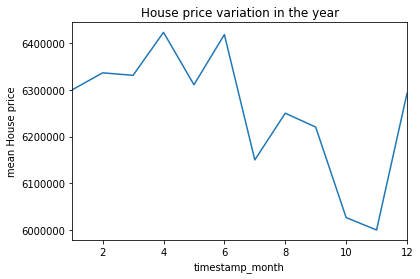

In [25]:
df_train.groupby('timestamp_month')['price_doc'].median().plot()
plt.title('House price variation in the year')
plt.ylabel('mean House price')

In [26]:
len(discrete), len(categorical)

(29, 15)

In [106]:
#export
class Tabular:
    def __init__(self, df_train:pd.DataFrame, df_val:pd.DataFrame , cat_cols:list=[], num_cols:list=[]):
        self.df_train=df_train.copy()
        self.df_val=df_val.copy()
        self.cat_cols=cat_cols
        self.num_cols=num_cols
        self.cat_col_dict={}
        self.rev_cat={}
        
    def conv_cat(self):
        for i in self.cat_cols:
            self.cat_col_dict[i]={k: j for j, k in enumerate(self.df_train[i].unique())}
            self.df_train[i].replace(self.cat_col_dict[i])
            self.df_val[i].replace(self.cat_col_dict[i])
            
    def impute_mean(self):
        self.mean_impute_dict={}
        for i in self.num_cols:
            self.mean_impute_dict[i]=self.df_train[i].mean()
            self.impute_na(self.df_train, i, self.mean_impute_dict[i])
            self.impute_na(self.df_val, i, self.mean_impute_dict[i])
            
    def impute_median(self):
        self.median_impute_dict={}
        for i in self.num_cols:
            self.median_impute_dict[i]=self.df_train[i].median()
            self.impute_na(self.df_train, i, self.median_impute_dict[i])
            self.impute_na(self.df_val, i, self.median_impute_dict[i])
            
    def impute_na(self, df:pd.DataFrame, col:str, value):
        df[col].fillna(value, inplace=True)
            
    def encode_disc(self):
        for i in self.dis_cols:
            df[i]=pd.qcut(df[i], 4)
    
    def ret_cat_codes(self):
        for i in self.cat_cols:
            self.df_train[i]=self.df_train[i].replace(self.cat_col_dict[i])
            self.impute_na(self.df_train, i, -1)
            self.df_val[i]=self.df_val[i].replace(self.cat_col_dict[i]) # dict(map(reversed, my_map.items()))
            self.impute_na(self.df_val, i, -1)

In [107]:
#export
def proc_df(df_tr:pd.DataFrame, df_va:pd.DataFrame, cat_cols:list, num_cols:list):
    data=Tabular(df_tr, df_va, cat_cols=cat_cols, num_cols=num_cols)
    data.impute_mean()
    data.conv_cat()
    data.ret_cat_codes()
    return data

In [108]:
data=proc_df(x_train, x_val, cat_cols=categorical+discrete, num_cols=continuous)

In [109]:
x_train

full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
id                                                                          
13765       26      9.0   15.0       25.0       4.0      1967.0       1.0   
20179       55      NaN   12.0        1.0       1.0         NaN       2.0   
15961       44     28.0    1.0       12.0       5.0      1968.0       2.0   
19729       91     62.0    5.0        5.0       2.0      1935.0       3.0   
5427        42     26.0    3.0        NaN       NaN         NaN       NaN   
...        ...      ...    ...        ...       ...         ...       ...   
28930       37     19.0    5.0       16.0       1.0      1979.0       1.0   
29837       60      NaN    7.0        1.0       1.0         NaN       2.0   
8102        45     28.0    9.0        NaN       NaN         NaN       NaN   
8540        47     30.0    3.0        NaN       NaN         NaN       NaN   
16216       44     27.0    5.0        9.0       1.0      1968.0       2.0   

       kitch_sq  state   product_type             sub_area        area_m  \
id                                                                         
13765       8.0    3.0     Investment  Poselenie Sosenskoe  6.677245e+07   
20179       1.0    1.0  OwnerOccupier    Zapadnoe Degunino  7.632940e+06   
15961       5.0    2.0     Investment          Golovinskoe  8.841267e+06   
19729       7.0    3.0     Investment           Mozhajskoe  1.686153e+07   
5427        NaN    NaN     Investment    Zapadnoe Degunino  7.632940e+06   
...         ...    ...            ...                  ...           ...   
28930       8.0    2.0     Investment         Horoshevskoe  8.568431e+06   
29837       1.0    NaN  OwnerOccupier             Krjukovo  1.084231e+07   
8102        NaN    NaN     Investment          Savelovskoe  2.641243e+06   
8540        NaN    NaN     Investment          Bogorodskoe  8.659075e+06   
16216       5.0    2.0     Investment              Kuncevo  5.235177e+07   

       raion_popul  green_zone_part  indust_part  children_preschool  \
id                                                                     
13765         9553         0.336177     0.072158                 656   
20179        78810         0.051844     0.437885                5519   
15961       100846         0.127512     0.307467                4566   
19729       132349         0.069671     0.130618                9005   
5427         78810         0.051844     0.437885                5519   
...            ...              ...          ...                 ...   
28930        56535         0.063648     0.236108                4694   
29837        85219         0.062172     0.161532                5767   
8102         57995         0.015900     0.051942                4119   
8540        104410         0.416866     0.069660                7103   
16216       142462         0.070662     0.035145                9347   

       preschool_quota  preschool_education_centers_raion  children_school  \
id                                                                           
13765              NaN                                  0              629   
20179           1503.0                                  3             5735   
15961           2646.0                                  4             5048   
19729           4182.0                                  6            10418   
5427            1503.0                                  3             5735   
...                ...                                ...              ...   
28930           2354.0                                  4             3893   
29837           5278.0                                  6             5648   
8102             884.0                                  2             4017   
8540            3107.0                                  7             6119   
16216           4050.0                                  7             9292   

       school_quota  school_education_centers_raion  \
id       

In [121]:
x_train['full_all'].plot()

D:\narain\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


Error in callback <function flush_figures at 0x000001FD32209DC8> (for post_execute):


KeyboardInterrupt: 

In [110]:
data.df_train

full_sq    life_sq  floor  max_floor  material  build_year  num_room  \
id                                                                            
13765       26   9.000000   15.0  25.000000       0.0   1967.0000  1.000000   
20179       55  34.362706   12.0   1.000000       1.0   3583.0346  2.000000   
15961       44  28.000000    1.0  12.000000       2.0   1968.0000  2.000000   
19729       91  62.000000    5.0   5.000000       3.0   1935.0000  3.000000   
5427        42  26.000000    3.0  12.536032       4.0   3583.0346  1.902521   
...        ...        ...    ...        ...       ...         ...       ...   
28930       37  19.000000    5.0  16.000000       1.0   1979.0000  1.000000   
29837       60  34.362706    7.0   1.000000       1.0   3583.0346  2.000000   
8102        45  28.000000    9.0  12.536032       4.0   3583.0346  1.902521   
8540        47  30.000000    3.0  12.536032       4.0   3583.0346  1.902521   
16216       44  27.000000    5.0   9.000000       1.0   1968.0000  2.000000   

       kitch_sq  state  product_type  sub_area        area_m  raion_popul  \
id                                                                          
13765  8.000000    0.0             0         0  6.677245e+07         9553   
20179  1.000000    1.0             1         1  7.632940e+06        78810   
15961  5.000000    2.0             0         2  8.841267e+06       100846   
19729  7.000000    0.0             0         3  1.686153e+07       132349   
5427   6.404713    3.0             0         1  7.632940e+06        78810   
...         ...    ...           ...       ...           ...          ...   
28930  8.000000    2.0             0        95  8.568431e+06        56535   
29837  1.000000    3.0             1        24  1.084231e+07        85219   
8102   6.404713    3.0             0        70  2.641243e+06        57995   
8540   6.404713    3.0             0       108  8.659075e+06       104410   
16216  5.000000    2.0             0       101  5.235177e+07       142462   

       green_zone_part  indust_part  children_preschool  preschool_quota  \
id                                                                         
13765         0.336177     0.072158                 656      3264.318866   
20179         0.051844     0.437885                5519      1503.000000   
15961         0.127512     0.307467                4566      2646.000000   
19729         0.069671     0.130618                9005      4182.000000   
5427          0.051844     0.437885                5519      1503.000000   
...                ...          ...                 ...              ...   
28930         0.063648     0.236108                4694      2354.000000   
29837         0.062172     0.161532                5767      5278.000000   
8102          0.015900     0.051942                4119       884.000000   
8540          0.416866     0.069660                7103      3107.000000   
16216         0.070662     0.035145                9347      4050.000000   

       preschool_education_centers_raion  children_school  school_quota  \
id                                                                        
13765                                  0              629   8310.514325   
20179                                  3             5735   5782.000000   
15961                                  4             5048   5396.000000   
19729                                  6            10418   8658.000000   
5427                                   3             5735   5782.000000   
...                                  ...              ...           ...   
28930                                  4             3893   6684.000000   
29837                                  6             5648  10529.000000   
8102                                   2             4017   2812.000000   
8540                                   7             6119   7277.000000   
16216                                  7             9292  11234.000000   

       schoo

In [80]:
def norm_max_min(df_train, df_val):
    res_train, res_val = df_train.copy(), df_val.copy()
    for feature_name in df_train.columns:
        max_value = df_train[feature_name].max()
        min_value = df_train[feature_name].min()
        res_train[feature_name] = (df_train[feature_name] - min_value) / (max_value - min_value)
        res_val[feature_name]= (df_val[feature_name]-min_value/ (max_value-min_value))
    return res_train, res_val

In [81]:
def normalize(df_train, df_val):
    res_train, res_val= df_train.copy(), data.df_val.copy()
    for feature_name in res_train.columns:
        mean_train=res_train[feature_name].mean()
        std_train=res_train[feature_name].std
        res_train[feature_name]=(res_train[feature_name]-mean_train)/std_train
        res_val[feature_name]=(res_val[feature_name]-mean_train)/std_train
    return res_train, res_val

In [ ]:
preds=clf.predict(X_val)

In [ ]:
r2_score(y_val, preds)

In [290]:
y_val[:10], preds[:10]

(id
 7726     12640380
 14920    20500000
 18669    14000000
 22009     7000000
 29603     1000000
 25546     4641000
 23814     5756303
 9332      6500000
 13947     5400000
 3653      5500000
 Name: price_doc, dtype: int64,
 array([ 6.77124275e+11,  3.59635378e+12,  2.91997679e+12,  9.68110173e+11,
         4.52550836e+12,  3.89481513e+10, -2.41197086e+10,  4.78898501e+12,
         4.06917335e+12,  3.33473077e+11]))

In [295]:
from sklearn.ensemble import RandomForestRegressor

In [299]:
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X_train, y_train)
preds=regr.predict(X_val)
r2_score(y_val, preds)

-26.1997974514665

In [300]:
y_val[:10], preds[:10]

(id
 7726     12640380
 14920    20500000
 18669    14000000
 22009     7000000
 29603     1000000
 25546     4641000
 23814     5756303
 9332      6500000
 13947     5400000
 3653      5500000
 Name: price_doc, dtype: int64,
 array([33595172.90340298, 33595172.90340298, 33595172.90340298,
        32955842.97149104, 31824090.21802514, 28483994.76756088,
        11264449.11355723, 33595172.90340298, 32838501.25733667,
        31824090.21802514]))

In [301]:
preds.std()

5267567.857889471